# Introduction to Scikit-Learn

This notebook demonstrates the most useful functions of the Scikit-Learn library.

## What are we going to cover?

0. An end-to-end Scikit-Learn Workflow.
1. Getting the data ready.
2. Choose the right estimator/algorithm for our problems.
3. Fit the model/algorithm and use it to make predictions on our data.
4. Evaluating a model.
5. Improve a model.
6. Save and load a trained model.
7. Putting it all together!

# 0. An end-to-end Scikit-Learn Workflow.

In [37]:
#Get the data ready
import pandas as pd
import numpy as np
heart_disease = pd.read_csv("data/heart-disease.csv")
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [38]:
#Create X (features matrix)
X = heart_disease.drop("target" , axis=1)

#Create Y (labels)
y = heart_disease["target"]

In [39]:
# 2. Choose the right model and hyperparameters
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100)

#We'll keep the default Hyperparameters
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [40]:
# 3. Fit the model to the training data
from sklearn.model_selection import train_test_split

X_train, X_test , y_train , y_test = train_test_split(X, y , test_size=0.2)

In [41]:
clf.fit(X_train , y_train)

RandomForestClassifier()

In [42]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
229,64,1,2,125,309,0,1,131,1,1.8,1,0,3
206,59,1,0,110,239,0,0,142,1,1.2,1,1,3
67,45,0,1,130,234,0,0,175,0,0.6,1,0,2
217,63,1,0,130,330,1,0,132,1,1.8,2,3,3
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
201,60,1,0,125,258,0,0,141,1,2.8,1,1,3
90,48,1,2,124,255,1,1,175,0,0.0,2,2,2
166,67,1,0,120,229,0,0,129,1,2.6,1,2,3
181,65,0,0,150,225,0,0,114,0,1.0,1,3,3


In [43]:
y_preds = clf.predict(X_test)
y_preds

array([0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0])

In [44]:
y_test

298    0
63     1
136    1
245    0
260    0
      ..
167    0
96     1
168    0
6      1
261    0
Name: target, Length: 61, dtype: int64

In [45]:
# 4. Evaluate the model on the training data and test data.
clf.score(X_train , y_train)

1.0

In [46]:
clf.score(X_test , y_test)

0.819672131147541

In [47]:
from sklearn.metrics import classification_report , confusion_matrix , accuracy_score

print(classification_report(y_test , y_preds))

              precision    recall  f1-score   support

           0       0.81      0.84      0.83        31
           1       0.83      0.80      0.81        30

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61



In [48]:
confusion_matrix(y_test , y_preds)

array([[26,  5],
       [ 6, 24]])

In [49]:
accuracy_score(y_test , y_preds)

0.819672131147541

In [50]:
# 5. Improve a model
# Try different amount of n_estimators
np.random.seed(42)
for i in range(10 , 100 , 10):
    print(f"Trying model with {i} estimators")
    clf = RandomForestClassifier(n_estimators=i).fit(X_train , y_train)
    print(f"Model accuracy on test set:{clf.score(X_test , y_test)*100:.2f}%")
    print("")

Trying model with 10 estimators
Model accuracy on test set:80.33%

Trying model with 20 estimators
Model accuracy on test set:81.97%

Trying model with 30 estimators
Model accuracy on test set:83.61%

Trying model with 40 estimators
Model accuracy on test set:81.97%

Trying model with 50 estimators
Model accuracy on test set:80.33%

Trying model with 60 estimators
Model accuracy on test set:81.97%

Trying model with 70 estimators
Model accuracy on test set:88.52%

Trying model with 80 estimators
Model accuracy on test set:75.41%

Trying model with 90 estimators
Model accuracy on test set:78.69%



In [51]:
# 6. Save a model and load it
import pickle

pickle.dump(clf , open("random_forest_model_1.pk1" , "wb"))

In [52]:
loaded_model = pickle.load(open("random_forest_model_1.pk1" , "rb"))
loaded_model.score(X_test , y_test)

0.7868852459016393

## Getting our data ready to be used with machine learning.

Three main things we have to do:

    1. Split the data into features and labels (usually `X` and `y`).
    
    2. Filling (also called imputing) or disregarding missing values.
    
    3. Converting non-numerical values to numerical values (also called feature encoding).

In [53]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [54]:
X = heart_disease.drop("target" , axis=1)
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [55]:
y = heart_disease["target"]
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [56]:
#Split the data into training and test sets.
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.2)

In [57]:
X_train.shape , X_test.shape , y_train.shape , y_test.shape

((242, 13), (61, 13), (242,), (61,))

In [58]:
X.shape[0]

303

In [59]:
X.shape[0] * 0.8

242.4

In [60]:
X.shape[0] * 0.2

60.6

In [61]:
242 + 61

303

In [62]:
len(heart_disease)

303

## 1.1) Make sure it's all numerical

In [63]:
car_sales = pd.read_csv("data/car-sales.csv")
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
1,Honda,Red,87899,4,"$5,000.00"
2,Toyota,Blue,32549,3,"$7,000.00"
3,BMW,Black,11179,5,"$22,000.00"
4,Nissan,White,213095,4,"$3,500.00"
5,Toyota,Green,99213,4,"$4,500.00"
6,Honda,Blue,45698,4,"$7,500.00"
7,Honda,Blue,54738,4,"$7,000.00"
8,Toyota,White,60000,4,"$6,250.00"
9,Nissan,White,31600,4,"$9,700.00"


In [64]:
car_sales["Doors"].value_counts()

Doors
4    8
3    1
5    1
Name: count, dtype: int64

In [65]:
len(car_sales)

10

In [66]:
car_sales.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price            object
dtype: object

In [67]:
#Split into X/y
X = car_sales.drop("Price",axis=1)
y = car_sales["Price"]

#Split into training and test
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.2)

In [68]:
#Build machine learning model
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train , y_train)
model.score(X_test, y_test)

ValueError: could not convert string to float: 'Honda'

In [69]:
#Turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make" , "Colour" , "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                   one_hot,
                                   categorical_features)],
                                   remainder="passthrough")
transformed_X = transformer.fit_transform(X)
transformed_X

array([[0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00,
        1.00000e+00, 0.00000e+00, 1.50043e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00,
        1.00000e+00, 0.00000e+00, 8.78990e+04],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00,
        1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
        0.00000e+00, 0.00000e+00, 3.25490e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 1.00000e+00, 1.11790e+04],
       [0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00,
        1.00000e+00, 0.00000e+00, 2.13095e+05],
       [0.00000e+00, 0.00000e+

In [70]:
pd.DataFrame(transformed_X)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,150043.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,87899.0
2,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,32549.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,11179.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,213095.0
5,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,99213.0
6,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,45698.0
7,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,54738.0
8,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,60000.0
9,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,31600.0


In [71]:
dummies = pd.get_dummies(car_sales[["Make" , "Colour" , "Doors"]])
dummies

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,False,False,False,True,False,False,False,False,True
1,4,False,True,False,False,False,False,False,True,False
2,3,False,False,False,True,False,True,False,False,False
3,5,True,False,False,False,True,False,False,False,False
4,4,False,False,True,False,False,False,False,False,True
5,4,False,False,False,True,False,False,True,False,False
6,4,False,True,False,False,False,True,False,False,False
7,4,False,True,False,False,False,True,False,False,False
8,4,False,False,False,True,False,False,False,False,True
9,4,False,False,True,False,False,False,False,False,True


In [72]:
# Let's refit the model
np.random.seed(42)
y = y.astype(str).str.replace(r'[\$,]', '', regex=True).astype(float)
X_train, X_test, y_train, y_test = train_test_split(transformed_X, y, test_size=0.2)
model.fit(X_train, y_train)


RandomForestRegressor()

In [73]:
model.score(X_test , y_test)

-1.2793638399999998

## 1.2) What if there were missing values?

    1. Fill them with some value(also known as imputation).
    2. Remove the samples with missing data altogether.

In [74]:
#Import car sales missing data
car_sales_missing = pd.read_csv("data/car-sales-missing-data.csv")
car_sales_missing

,Make,Colour,Odometer,Doors,Price
0,Toyota,White,150043.0,4.0,"$4,000"
1,Honda,Red,87899.0,4.0,"$5,000"
2,Toyota,Blue,NaN,3.0,"$7,000"
3,BMW,Black,11179.0,5.0,"$22,000"
4,Nissan,White,213095.0,4.0,"$3,500"
5,Toyota,Green,NaN,4.0,"$4,500"
6,Honda,NaN,NaN,4.0,"$7,500"
7,Honda,Blue,NaN,4.0,NaN
8,Toyota,White,60000.0,NaN,NaN
9,NaN,White,31600.0,4.0,"$9,700"


In [75]:
# Ensure "Price" is a string before applying str.replace
car_sales_missing["Price"] = car_sales_missing["Price"].astype(str)

# Clean "Price" column by removing "$" and ","
car_sales_missing["Price"] = car_sales_missing["Price"].str.replace("$", "", regex=False).str.replace(",", "", regex=False)

# Convert "Price" to numeric, keeping NaN values
car_sales_missing["Price"] = pd.to_numeric(car_sales_missing["Price"], errors="coerce")

car_sales_missing["Make"] = car_sales_missing["Make"].fillna("Ferrari")
car_sales_missing["Colour"] = car_sales_missing["Colour"].fillna("Pink")

# Convert "Odometer" and "Doors" to integers, filling NaN with default values
car_sales_missing["Odometer"] = car_sales_missing["Odometer"].fillna(car_sales_missing["Odometer"].median()).astype(int)
car_sales_missing["Doors"] = car_sales_missing["Doors"].fillna(4).astype(int)
car_sales_missing["Price"] = car_sales_missing["Price"].fillna(2000).astype(int)

# Define the number of rows
num_rows = 1000

# Generate random data for each column
np.random.seed(42)  # For reproducibility

# Randomly choose "Make" from a predefined list
makes = ['Toyota', 'Honda', 'BMW', 'Nissan', 'Ford', 'Chevrolet', 'Ferrari']
make_data = np.random.choice(makes, num_rows)

# Randomly choose "Colour" from a predefined list
colours = ['White', 'Red', 'Blue', 'Black', 'Green', 'Yellow', 'Pink']
colour_data = np.random.choice(colours, num_rows)

# Random "Odometer" values between 10,000 and 300,000
odometer_data = np.random.randint(10000, 300000, num_rows)

# Random "Doors" values (4, 2, 5)
doors_data = np.random.choice([2, 4, 5], num_rows)

# Random "Price" values (from 2000 to 30,000)
price_data = np.random.randint(2000, 30000, num_rows)

# Create a DataFrame with the random data
car_sales_random = pd.DataFrame({
    'Make': make_data,
    'Colour': colour_data,
    'Odometer': odometer_data,
    'Doors': doors_data,
    'Price': price_data
})
car_sales_missing.to_csv("data/car_sales_cleaned.csv", index=False)

car_sales_missing


,Make,Colour,Odometer,Doors,Price
0,Toyota,White,150043,4,4000
1,Honda,Red,87899,4,5000
2,Toyota,Blue,73949,3,7000
3,BMW,Black,11179,5,22000
4,Nissan,White,213095,4,3500
5,Toyota,Green,73949,4,4500
6,Honda,Pink,73949,4,7500
7,Honda,Blue,73949,4,2000
8,Toyota,White,60000,4,2000
9,Ferrari,White,31600,4,9700


## 2. Choosing the right estimator/algorithm for your problem

Some things to note:
    . Sklearn refers to machine learning models , algorithms as estimators.
    . Classification problem - predicting a category (heart disease or not).
            .Sometimes you see clf(short for classifier) used as a Classification estimator.
    . Regression problem - predicting a number(selling price of a car).

If you're working on ml problem and looking to use Sklearn and not sure what model you should use - check this map for help - https://scikit-learn.org/stable/machine_learning_map.html

## 2.1) Picking a machine learning model for a regression problem

Let's use the California Housing Dataset : https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html

In [76]:
#Get California Housing Dataset
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]], shape=(20640, 8)),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894], shape=(20640,)),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': 

In [77]:
housing_df = pd.DataFrame(housing["data"] , columns= housing["feature_names"])
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [78]:
housing_df["target"] = housing["target"]
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [79]:
housing_df = housing_df.drop("MedHouseVal" , axis=1)
housing_df

KeyError: "['MedHouseVal'] not found in axis"

In [ ]:
#Import Algorithm / Estimator
from sklearn.linear_model import Ridge

#Setup random seed
np.random.seed(42)

#Create the data
X = housing_df.drop("target" , axis=1)
y = housing_df["target"] #median house price in $100,000s.

#Split into train and test sets
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.2)

#Instantiate and fit the model (on the training set)
model = Ridge()
model.fit(X_train , y_train)

#Check the score of the model on the test set
model.score(X_test , y_test)

What if 'Ridge' didn't work or the score didn't fit our needs?

Well , we could always try a different model

How about we try an ensemble model (an ensemble is a combination of smaller models to try and make better than just a single model)?

Sklearn's ensemble model can be found here : https://scikit-learn.org/stable/modules/ensemble.html#forest

In [ ]:
#Import the RandomForestRegressor model class from the ensemble module
from sklearn.ensemble import RandomForestRegressor

#Setup random seed
np.random.seed(42)

#Create the data
X = housing_df.drop("target" , axis=1)
y = housing_df["target"] #median house price in $100,000s.

#Split into train and test sets
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.2)

#Instantiate and fit the model (on the training set)
model = RandomForestRegressor()
model.fit(X_train , y_train)

#Check the score of the model on the test set
model.score(X_test , y_test)


## 2.2)Picking a machine learning model for our Classification problem


Let's use a Iris Plant dataset : https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html

In [ ]:
#Import the datset of Iris
from sklearn.datasets import load_iris
plants = load_iris()
plants

In [ ]:
plants_df = pd.DataFrame(plants["data"] , columns=plants["feature_names"])
plants_df

In [ ]:
plants_df["target"] = plants["target"]
plants_df

In [ ]:
#Import the LinearSVC model class from the svm module
from sklearn.svm import LinearSVC

#Setup random seed
np.random.seed(42)

#Create the data
X = plants_df.drop("target" , axis=1)
y = plants_df["target"] 

#Split into train and test sets
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.3)

#Instantiate and fit the model (on the training set)
model = LinearSVC()
model.fit(X_train , y_train)

#Check the score of the model on the test set
print(f"{model.score(X_test, y_test) * 100:.2f}%")


## Use heart_disease sample

In [ ]:
heart_disease

In [ ]:
#Import the LinearSVC model class from the svm module
from sklearn.svm import LinearSVC

#Setup random seed
np.random.seed(42)

#Create the data
X = heart_disease.drop("target" , axis=1)
y = heart_disease["target"] 

#Split into train and test sets
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.3)

#Instantiate and fit the model (on the training set)
model = LinearSVC()
model.fit(X_train , y_train)

#Check the score of the model on the test set
print(f"{model.score(X_test, y_test) * 100:.2f}%")


1. If you have structured data , then use ensemble methods
2. If you have unstructured data , then use deep learning or transfer learning

## 3)Fit the model/algorithm on our data and use it to make predictions.

### 2.1)Fitting the model to the data.

Different names for:
* `X` = features , feature variables
* `y` = target , labels , target variables

In [ ]:
#Import the LinearSVC model class from the svm module
from sklearn.svm import LinearSVC

#Setup random seed
np.random.seed(42)

#Create the data
X = heart_disease.drop("target" , axis=1)
y = heart_disease["target"] 

#Split into train and test sets
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.3)

#Instantiate and fit the model (on the training set)
model = LinearSVC()

#Fit the model to the data(training the ml model)
model.fit(X_train , y_train)

#Check the score of the model on the test set(use the patterns the model has learned)
print(f"{model.score(X_test, y_test) * 100:.2f}%")


In [ ]:
X.head()

In [ ]:
y.head()

### 3.2)Make predictions using a ml model

Two ways to make the prediction:
1. `predict()`
2. `predict_proba()`

In [ ]:
#Use a trained model to make predictions
model.predict(X_test)

In [ ]:
np.array(y_test)

In [ ]:
X_test.head()

In [ ]:
#Compare predictions to truth labels to evaluate the model
y_preds = model.predict(X_test)
np.mean(y_preds == y_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test , y_preds)

## Make predictions with predict_proba()


In [ ]:
#predict_proba() returns probabilities of a classification label


`predict()` can also be used for regression_models.

In [ ]:
housing_df.head()

In [ ]:
#Import the RandomForestRegressor model class from the ensemble module
from sklearn.ensemble import RandomForestRegressor

#Setup random seed
np.random.seed(42)

#Create the data
X = housing_df.drop("target" , axis=1)
y = housing_df["target"] #median house price in $100,000s.

#Split into train and test sets
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.2)

#Instantiate and fit the model (on the training set)
model = RandomForestRegressor()
model.fit(X_train , y_train)

#Check the score of the model on the test set
model.score(X_test , y_test)

#Make predictions
y_preds = model.predict(X_test)

In [ ]:
y_preds[:10]

In [ ]:
np.array(y_test[:10])

In [ ]:
len(y_preds)

In [ ]:
len(y_test)

In [ ]:
#Compare predictions to the truth
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test , y_preds)

## 4. Evaluating a machine learning model

Three ways to evaluate Scikit-Learn models/estimators:
1. Estimator's built-in `score()` method.
2. The `scoring` parameter.
3. Problem-specific metric functions.

You can read more about these here: https://scikit-learn.org/stable/modules/model_evaluation.html

### 4.1)Evaluating a model with `score()` method.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

#Setting up random seed
np.random.seed(42)

#Create the data
X = heart_disease.drop("target" , axis=1)
y = heart_disease["target"] 

#Split into train and test sets
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.2)

#Instantiate and fit the model (on the training set)
model = RandomForestClassifier()
model.fit(X_train , y_train)

#Check the score of the model on the test set
model.score(X_test , y_test)

#Check the score of the model on the train set
model.score(X_train , y_train)

print(f"The score of the model on the train set is {model.score(X_train, y_train) * 100:.2f}% and the score of the model on the test set is {model.score(X_test, y_test) * 100:.2f}% .")

#Make predictions
y_preds = model.predict(X_test)

Let's use the `score()` on our regression problem

In [ ]:
#The default score() evaluation metric is r_squared for regression algorithms .
#Highest=1.0 , Lowest=0.0
model.score(X_test , y_test)

In [ ]:
y_test.mean()

## 4.2)Evaluating a model using the `scoring` parameter.

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

#Setting up random seed
np.random.seed(42)

#Create the data
X = heart_disease.drop("target" , axis=1)
y = heart_disease["target"] 

#Split into train and test sets
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.2)

#Instantiate and fit the model (on the training set)
model = RandomForestClassifier(n_estimators=100)
model.fit(X_train , y_train)


In [ ]:
model.score(X_test , y_test)

In [ ]:
cross_val_score(model , X , y , cv=10)

In [ ]:
np.random.seed(42)

#Single training and test split score
model_single_score = model.score(X_test , y_test)

#Take the mean of 5-fold cross-validation score
model_cross_val_score = np.mean(cross_val_score(model , X , y , cv=5))

#Compare the two of them
model_single_score , model_cross_val_score

In [ ]:
#Default scoring parameter of classifier = mean accuracy
model.score()

In [ ]:
#Scoring parameter set to None by default
cross_val_score(model , X , y , cv=5 , scoring=None)

## 4.2.1)Classification model evaluation metrics

1. Accuracy
2. Area under ROC curve
3. Confusion matrix
4. Classification Report

**Accuracy**

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

#Setting up random seed
np.random.seed(42)

#Create the data
X = heart_disease.drop("target" , axis=1)
y = heart_disease["target"] 

model = RandomForestClassifier()
cross_val_score = cross_val_score(model , X , y , cv=5)


In [ ]:
np.mean(cross_val_score)

In [ ]:
print(f"Heart Disease Classifier Cross-Validated Accuracy: {np.mean(cross_val_score) * 100:.2f}%")

**Area under the receiver operating characteristic curve(AUC/ROC)**

* Area under curve(AUC)
* ROC curve

ROC curves are a comparison of a model's true positive rate(TPR) versus a models false positive rate(FPR).

* True positive  = model predicts 1 when truth is 1.
* False positive = model predicts 1 when truth is 0.
* True negative  = model predicts 0 when truth is 0.
* False negative = model predicts 0 when truth is 1.

In [ ]:
#Create X_test... etc
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [ ]:
from sklearn.metrics import roc_curve

#Fit the classifier
model.fit(X_train , y_train)

#Make predictions with probabilities
y_probs = model.predict_proba(X_test)

y_probs[:10] , len(y_probs)

In [ ]:
y_probs_positive = y_probs[:,1]
y_probs_positive[:10]

In [ ]:
#Calculate FPR , TPR and thresholds
fpr , tpr , thresolds = roc_curve(y_test , y_probs_positive)

#Check the False positive rates
fpr

In [ ]:
#Create a function for plotting ROC curve.
import matplotlib.pyplot as plt

def plot_roc_curve(fpr , tpr):
    """
    Plots a ROC curve given the false positive rate (fpr) and true positive rate(tpr) of a model.
    """
    #Plot ROC curve
    plt.plot(fpr , tpr , color="pink" , label="ROC")
    #Plot line with no predictive power (baseline)
    plt.plot([0,1] , [0,1] , color="violet" , linestyle="--" , label="Guessing")

    #Customise the plot
    plt.xlabel("False positive rate(fpr)")
    plt.ylabel("True positive rate(tpr)")
    plt.title("Receiver operating characteristic(ROC) curve")
    plt.legend()
    plt.show()

plot_roc_curve(fpr,tpr)

In [ ]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test , y_probs_positive)

In [ ]:
#Plot the perfect ROC curve and AUC score
fpr , tpr , thresholds = roc_curve(y_test,y_test)
plot_roc_curve(fpr , tpr)

In [ ]:
#Perfect AUC score
roc_auc_score(y_test , y_test)

**Confusion Matrix**

The next way to evaluate a classification model is by using a confusion matrix.

A confusion matrix is a quick way to compare the labels a model predicts and the actual label it was supposed to predict. In essence, giving you an idea of where the model is getting confused.

In [ ]:
from sklearn.metrics import confusion_matrix

y_preds = model.predict(X_test)

confusion_matrix(y_test,y_preds)

In [ ]:
#Visualize confusion matrix with pd.crosstab()
pd.crosstab(y_test,y_preds ,
           rownames=["Actual labels"],
           colnames=["Predicted labels"])

In [ ]:
23+6+6+26

In [ ]:
len(X_test)

In [ ]:
#Make our confusion matrix more visual with seaborn's heatmap()
import seaborn as sns

#Set the font scale
sns.set(font_scale=1.5)

#Create a confusion matrix
conf_mat = confusion_matrix(y_test , y_preds)

#Plot it using seaborn
sns.heatmap(conf_mat)

#### To use the new methods of creating a confusion matrix with Scikit-Learn you will need sklearn version 1.0+.

In [ ]:
import sklearn
sklearn.__version__

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(model,X_test,y_test)
plt.show()

**Classification Report**

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_preds))

In [ ]:
# Where precision and recall becomes valuable
disease_true = np.zeros(10000)
disease_true[0] = 1 #only one positive case

disease_preds = np.zeros(10000) #model predicts every case as zero

pd.DataFrame(classification_report(disease_true,disease_preds,output_dict=True))

### 4.2.2) Regression model evaluation metrics

Model Evaluation Metrics Documentation: https://scikit-learn.org/stable/modules/model_evaluation.html

The ones we're going to cover are:

1. R^2(pronounced R-squared) or coefficient of determination
2. Mean Absolute error(MAE).
3. Mean squared error(MSE).

**What a R^2 square does?**
- It compares your models predictions to the mean of the targets. Values can range from negativity infinity(a very poor model) to 1. For example, if all your model does is predict the mean of the targets , it's R^2 value would be 0 . And if your model perfectly predicts a range of numbers it's R^2 would be 1.

In [ ]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X= housing_df.drop("target" , axis=1)
y= housing_df["target"]

X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.2)

model = RandomForestRegressor(n_estimators=100)
model.fit(X_train , y_train)

model.score(X_test , y_test)

In [ ]:
housing_df.head()

In [ ]:
y_test

In [ ]:
y_test.mean()

In [ ]:
from sklearn.metrics import r2_score

#Fill an array with y_test mean
y_test_mean = np.full(len(y_test) , y_test.mean())

In [ ]:
y_test_mean[:10]

In [ ]:
r2_score(y_true = y_test ,
         y_pred = y_test_mean)

In [ ]:
r2_score(y_true = y_test ,
         y_pred = y_test)

**Mean Absolute error(MAE)**

MAE is the average of the absolute differences between predictions and actual values . It gives you an idea of how wrong your model predictions are.

In [ ]:
from sklearn.metrics import mean_absolute_error

y_preds = model.predict(X_test)
mae = mean_absolute_error(y_test,y_preds)
mae

In [ ]:
df = pd.DataFrame(data={"actual values" : y_test ,
                        "predicted values" : y_preds,
                        "difference" : y_preds-y_test})
df

In [ ]:
np.abs(df["difference"]).mean()

In [ ]:
y_preds

In [ ]:
y_test

**Mean squared error(MSE)**

MSE is the mean of the square of the errors between actual and predicted values.

In [ ]:
from sklearn.metrics import mean_squared_error

y_preds = model.predict(X_test)
mse = mean_squared_error(y_test , y_preds)
mse

In [ ]:
df["squared_differences"] = np.square(df["difference"])
df

In [ ]:
#Calculate MSE by hand 
squared = np.square(df["difference"])
squared.mean()

In [ ]:
df_large_error = df.copy()
df_large_error.iloc[0]["squared_differences"] = 16

In [ ]:
df_large_error

In [ ]:
#Calculate MSE with large error
df_large_error["squared_differences"].mean()

In [ ]:
df_large_error.iloc[1:100] = 20
df_large_error

In [ ]:
df_large_error["squared_differences"].mean()

In [ ]:
df_large_error.iloc[1:100] = 20
df_large_error

**Machine Learning Model Evaluation**
Evaluating the results of a machine learning model is as important as building one.

But just like how different problems have different machine learning models, different machine learning models have different evaluation metrics.

Below are some of the most important evaluation metrics you'll want to look into for classification and regression models.

Classification Model Evaluation Metrics/Techniques

Accuracy - The accuracy of the model in decimal form. Perfect accuracy is equal to 1.0.

Precision - Indicates the proportion of positive identifications (model predicted class 1) which were actually correct. A model which produces no false positives has a precision of 1.0.

Recall - Indicates the proportion of actual positives which were correctly classified. A model which produces no false negatives has a recall of 1.0.

F1 score - A combination of precision and recall. A perfect model achieves an F1 score of 1.0.

Confusion matrix - Compares the predicted values with the true values in a tabular way, if 100% correct, all values in the matrix will be top left to bottom right (diagonal line).

Cross-validation - Splits your dataset into multiple parts and train and tests your model on each part then evaluates performance as an average.

Classification report - Sklearn has a built-in function called classification_report() which returns some of the main classification metrics such as precision, recall and f1-score.

ROC Curve - Also known as receiver operating characteristic is a plot of true positive rate versus false-positive rate.

Area Under Curve (AUC) Score - The area underneath the ROC curve. A perfect model achieves an AUC score of 1.0.

Which classification metric should you use?

Accuracy is a good measure to start with if all classes are balanced (e.g. same amount of samples which are labelled with 0 or 1).

Precision and recall become more important when classes are imbalanced.

If false-positive predictions are worse than false-negatives, aim for higher precision.

If false-negative predictions are worse than false-positives, aim for higher recall.

F1-score is a combination of precision and recall.

A confusion matrix is always a good way to visualize how a classification model is going.

Regression Model Evaluation Metrics/Techniques

R^2 (pronounced r-squared) or the coefficient of determination - Compares your model's predictions to the mean of the targets. Values can range from negative infinity (a very poor model) to 1. For example, if all your model does is predict the mean of the targets, its R^2 value would be 0. And if your model perfectly predicts a range of numbers it's R^2 value would be 1.

Mean absolute error (MAE) - The average of the absolute differences between predictions and actual values. It gives you an idea of how wrong your predictions were.

Mean squared error (MSE) - The average squared differences between predictions and actual values. Squaring the errors removes negative errors. It also amplifies outliers (samples which have larger errors).

Which regression metric should you use?

R2 is similar to accuracy. It gives you a quick indication of how well your model might be doing. Generally, the closer your R2 value is to 1.0, the better the model. But it doesn't really tell exactly how wrong your model is in terms of how far off each prediction is.

MAE gives a better indication of how far off each of your model's predictions are on average.

As for MAE or MSE, because of the way MSE is calculated, squaring the differences between predicted values and actual values, it amplifies larger differences. Let's say we're predicting the value of houses (which we are).

Pay more attention to MAE: When being $10,000 off is twice as bad as being $5,000 off.

Pay more attention to MSE: When being $10,000 off is more than twice as bad as being $5,000 off.

For more resources on evaluating a machine learning model, be sure to check out the following resources:

Scikit-Learn documentation for metrics and scoring (quantifying the quality of predictions)

Beyond Accuracy: Precision and Recall by Will Koehrsen

Stack Overflow answer describing MSE (mean squared error) and RSME (root mean squared error)

### 4.2.3 Finally using the `scoring()` parameter

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target" , axis=1)
y = heart_disease["target"]

clf = RandomForestClassifier(n_estimators=100)

In [ ]:
np.random.seed(42)

#Cross Validation Accuracy
cv_acc = cross_val_score(clf , X , y , cv=5 , scoring=None) #if scoring=None then estimator's default scoring evaluation metric is used (accuracy for model classification)
cv_acc

In [ ]:
#Cross Validated Accuracy
print(f"The Cross Validated Accuracy is: {np.mean(cv_acc)*100:.2f}%")

In [ ]:
np.random.seed(42)

cv_acc = cross_val_score(clf , X , y , cv=5 , scoring="accuracy") #if scoring=None then estimator's default scoring evaluation metric is used (accuracy for model classification)
cv_acc

In [ ]:
#Cross Validated Accuracy
print(f"The Cross Validated Accuracy is: {np.mean(cv_acc)*100:.2f}%")

In [ ]:
#Precision
np.random.seed(42)

cv_precision = cross_val_score(clf , X , y , cv=5 , scoring="precision") #if scoring=None then estimator's default scoring evaluation metric is used (accuracy for model classification)
cv_precision

In [ ]:
#Cross Validated Precision
print(f"The Cross Validated Precision is: {np.mean(cv_precision)*100:.2f}%")

In [ ]:
#Recall
np.random.seed(42)

cv_recall = cross_val_score(clf , X, y , cv=5 , scoring="recall") #if scoring=None then estimator's default scoring evaluation metric is used (accuracy for model classification)
cv_recall

In [ ]:
#Cross Validated Recall
print(f"The Cross Validated Recall is: {np.mean(cv_recall)*100:.2f}%")

Let's see the `scoring` parameter used in regression problem

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X = housing_df.drop("target" , axis=1)
y = housing_df["target"]

model = RandomForestRegressor(n_estimators=100)

In [ ]:
np.random.seed(42)

cv_r2 = cross_val_score(model , X , y , cv=3 , scoring=None)
np.mean(cv_r2)

In [ ]:
cv_r2

In [ ]:
#Mean squared error
cv_mse = cross_val_score(model , X , y , cv=3 , scoring="neg_mean_squared_error")
np.mean(cv_mse)

# 4.3 Using different Evaluation metrics as Scikit-Learn functions

The 3rd way to evaluate scikit-learn machine learning models/estimators is use the `sklearn.metrics` module - https://scikit-learn.org/stable/api/sklearn.metrics.html


In [82]:
from sklearn.metrics import accuracy_score , precision_score , f1_score , recall_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

np.random.seed(4)

#Create X & y
X = heart_disease.drop("target" , axis=1)
y = heart_disease["target"]

#Split Data
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.2)

#Create model
clf = RandomForestClassifier()

#Fit model
clf.fit(X_train , y_train)

#Prediction
y_pred = clf.predict(X_test)

#Evaluate model using evaluation functions
print("Classifier metrics on the test set")
print(f"Accuracy: {accuracy_score(y_test , y_pred)*100:.2f}%")
print(f"Precision Score: {precision_score(y_test , y_pred)*100:.2f}%")
print(f"Recall Score: {recall_score(y_test , y_pred)*100:.2f}%")
print(f"F1-Score: {f1_score(y_test , y_pred)*100:.2f}%")

Classifier metrics on the test set
Accuracy: 88.52%
Precision Score: 91.43%
Recall Score: 88.89%
F1-Score: 90.14%


In [83]:
from sklearn.metrics import r2_score,mean_absolute_error , mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

np.random.seed(4)

#Create X & y
X = housing_df.drop("target" , axis=1)
y = housing_df["target"]

#Split Data
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.2)

#Create model
model = RandomForestRegressor()

#Fit model
model.fit(X_train , y_train)

#Prediction
y_pred = clf.predict(X_test)

#Evaluate model using evaluation functions
print("Regressor metrics on the test set")
print(f"R2-Score: {r2_score(y_test , y_pred)*100:.2f}%")
print(f"Mean Absolute Error: {mean_absolute_error(y_test , y_pred)*100:.2f}%")
print(f"Mean Squared Error: {mean_squared_error(y_test , y_pred)*100:.2f}%")

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- AveBedrms
- AveOccup
- AveRooms
- HouseAge
- Latitude
- ...
Feature names seen at fit time, yet now missing:
- age
- ca
- chol
- cp
- exang
- ...


## 5) Improving a Model

First predictions = baseline predictions
First model = baseline model

From a data perspective:
* Could we collect more data ? (generally the more data -> the more better)
* Could we improve our data?

From a model perspective:
* Is there a better model we could use?
* Could we improve the current model?

Parameters vs Hyperparameters

* Parameters = model find these patterns in data.
* Hyperparameters = settings on a model you can adjust to (potentially) improve its ability to find patterns

Three ways to adjust Hyperparameters:
* By hand.
* Randomly with RandomSearchCV
* Exhaustibly with GridSearchCV

In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()

In [ ]:
clf.get_params()

## 5.1 Tuning hyperparameters by hand

Let's make 3 sets: training, validation, and test.

In [ ]:
clf.get_params()

We're going to try and adjust :

* `max_depth`
* `max_features`
* `min_samples_leaf`
* `min_samples_split`
* `n_estimators`

In [84]:
def evaluate_preds(y_true , y_preds):
    """
    Performs evaluation comparison on y_true labels vs y_pred labels on a classification model.
    """
    accuracy = accuracy_score(y_true , y_preds)
    precision = precision_score(y_true , y_preds)
    recall = recall_score(y_true , y_preds)
    f1 = f1_score(y_true , y_preds)
    metric_dict = {"accuracy" : round(accuracy , 2),
                   "precision" : round(precision , 2),
                   "recall" : round(recall , 2),
                   "f1" : round(f1 , 2)}

    print(f"Acc: {accuracy * 100:.2f}%")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1-Score: {f1:.2f}")

    return metric_dict

In [85]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

#Shuffle the data
heart_disease_shuffled = heart_disease.sample(frac=1)

#Split the data into X and y
X = heart_disease_shuffled.drop("target" , axis=1)
y = heart_disease_shuffled["target"]

#Split the data into train , validation & test sets
train_split = round(0.7 * len(heart_disease_shuffled)) #70% of data
valid_split = round(train_split + 0.15 * len(heart_disease_shuffled)) #15% of data
X_train , y_train = X[:train_split] , y[:train_split]
X_valid , y_valid = X[train_split : valid_split] , y[train_split : valid_split]
X_test , y_test = X[valid_split:] , y[valid_split:]

clf = RandomForestClassifier()
clf.fit(X_train , y_train)

#Make baseline predictions
y_preds = clf.predict(X_valid)

#Evaluate the classifier on the validation set
baseline_metrics = evaluate_preds(y_valid , y_preds)
baseline_metrics

Acc: 82.22%
Precision: 0.81
Recall: 0.88
F1-Score: 0.85


{'accuracy': 0.82, 'precision': 0.81, 'recall': 0.88, 'f1': 0.85}

In [86]:
len(X_train) , len(X_valid) , len(X_test) ,len(heart_disease)

(212, 45, 46, 303)

In [87]:
212 + 45 + 46

303

In [88]:
np.random.seed(42)

#Create a second classifier with different hyperparameters
clf_2 = RandomForestClassifier(n_estimators=100)
clf_2.fit(X_train , y_train)

#Make predictions with different hyperparameters
y_preds_2 = clf_2.predict(X_valid)

#Evaluate the 2nd classifier
clf_2_metrics = evaluate_preds(y_valid , y_preds_2)

Acc: 82.22%
Precision: 0.84
Recall: 0.84
F1-Score: 0.84


## 5.2 Hyperparameter tuning with RandomizedSearchCV


In [89]:
from sklearn.model_selection import RandomizedSearchCV

grid = {"n_estimators" : [10 , 100 , 200 , 500 , 1000 , 1200],
        "max_depth" : ["None" , 5 , 10 , 20 , 30],
        "max_features" : ["auto" , "sqrt"],
        "min_samples_split" : [2 , 4 , 6],
        "min_samples_leaf" : [1 , 2 , 4]}

np.random.seed(42)

#Split the data into X and y
X = heart_disease_shuffled.drop("target" , axis=1)
y = heart_disease_shuffled["target"]

#Split into train and test sets
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.2)

#Instantiate RandomForestClassifier()
clf = RandomForestClassifier(n_jobs= 1)

#Setup RandomizedSearchCV()
rs_clf = RandomizedSearchCV(estimator= clf , param_distributions= grid , n_iter=10 , cv=5 , verbose=2)

#Fit the RandomizedSearchCV version of clf
rs_clf.fit(X_train , y_train)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   4.1s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   3.9s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   3.9s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   3.9s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   3.9s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100

C:\Users\kuhel\Desktop\AIML\env\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
30 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\kuhel\Desktop\AIML\env\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\kuhel\Desktop\AIML\env\Lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
  File "C:\Users\kuhel\Desktop\AIML\env\Lib\site-packages\sklearn\base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\kuhel\

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=1),
                   param_distributions={'max_depth': ['None', 5, 10, 20, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 4, 6],
                                        'n_estimators': [10, 100, 200, 500,
                                                         1000, 1200]},
                   verbose=2)

In [90]:
#Which hyperparameter gives best result?
rs_clf.best_params_

{'n_estimators': 1200,
 'min_samples_split': 6,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 5}

In [91]:
#Make predictions with the best hyperparameters
rs_y_preds = rs_clf.predict(X_test)

#Evaluate the predictions
rs_metrics = evaluate_preds(y_test , rs_y_preds)

Acc: 81.97%
Precision: 0.76
Recall: 0.89
F1-Score: 0.82


### 5.3 Hyperparameter tuning with GridSearchCV


In [92]:
grid

{'n_estimators': [10, 100, 200, 500, 1000, 1200],
 'max_depth': ['None', 5, 10, 20, 30],
 'max_features': ['auto', 'sqrt'],
 'min_samples_split': [2, 4, 6],
 'min_samples_leaf': [1, 2, 4]}

In [93]:
grid_2 = {'n_estimators': [100, 200, 500],
          'max_depth': [None],
          'max_features': ['auto', 'sqrt'],
          'min_samples_split': [6],
          'min_samples_leaf': [1, 2]}

In [94]:
3*1*2*1*2*5

60

In [95]:
from sklearn.model_selection import GridSearchCV , train_test_split

np.random.seed(42)

#Split the data into X and y
X = heart_disease_shuffled.drop("target" , axis=1)
y = heart_disease_shuffled["target"]

#Split into train and test sets
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.2)

#Instantiate RandomForestClassifier()
clf = RandomForestClassifier(n_jobs= 1)

#Setup GridSearchCV()
gs_clf = GridSearchCV(estimator= clf , param_grid= grid_2 , cv=5 , verbose=2)

#Fit the GridSearchCV version of clf
gs_clf.fit(X_train , y_train)


Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, 

C:\Users\kuhel\Desktop\AIML\env\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
30 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\kuhel\Desktop\AIML\env\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\kuhel\Desktop\AIML\env\Lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
  File "C:\Users\kuhel\Desktop\AIML\env\Lib\site-packages\sklearn\base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\kuhel\

GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=1),
             param_grid={'max_depth': [None], 'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2], 'min_samples_split': [6],
                         'n_estimators': [100, 200, 500]},
             verbose=2)

In [96]:
gs_clf.best_params_

{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 6,
 'n_estimators': 100}

In [97]:
gs_y_preds = gs_clf.predict(X_test)

#Evaluate the predictions
gs_metrics = evaluate_preds(y_test , gs_y_preds)

Acc: 81.97%
Precision: 0.77
Recall: 0.86
F1-Score: 0.81


Let's compare our different models metrics

In [98]:
compare_metrics = pd.DataFrame({
                                "baseline" : baseline_metrics ,
                                "clf_2" : clf_2_metrics,
                                "random search" : rs_metrics ,
                                "grid search" : gs_metrics})

compare_metrics

,baseline,clf_2,random search,grid search
accuracy,0.82,0.82,0.82,0.82
precision,0.81,0.84,0.76,0.77
recall,0.88,0.84,0.89,0.86
f1,0.85,0.84,0.82,0.81


<Axes: >

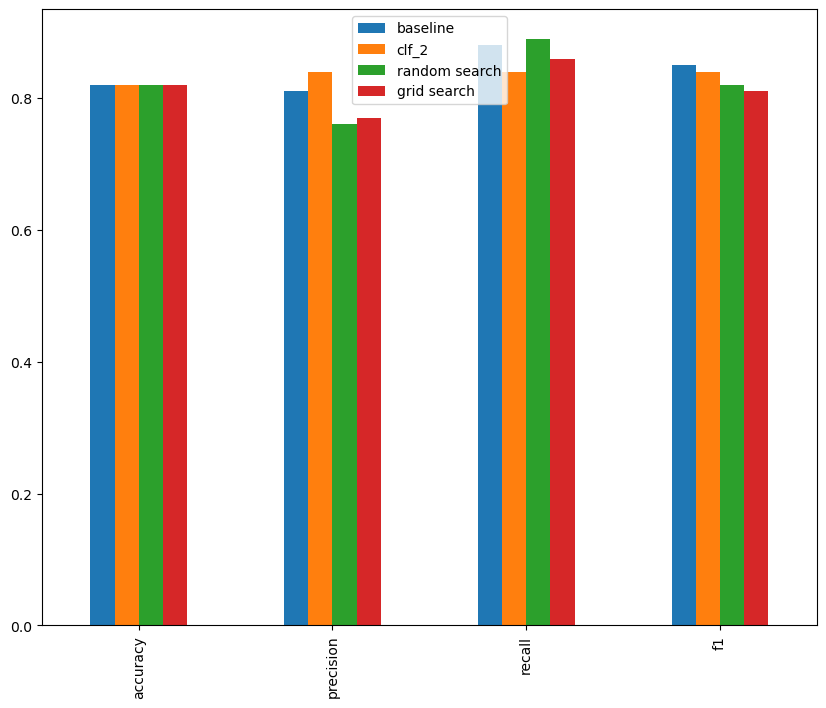

In [100]:
compare_metrics.plot.bar(figsize=(10 , 8))

## 6. Saving and Loading trained machine learning models

Two ways to save and load machine learning models:
1. With python's `pickle` module.
2. With the `joblib` module.

**Pickle**

In [101]:
import pickle

#Save an existing model to file
pickle.dump(gs_clf , open("gs_random_forest_model_1.pkl","wb"))

In [102]:
#Load a saved model
loaded_pickle_model = pickle.load(open("gs_random_forest_model_1.pkl","rb"))

In [103]:
#Make some predictions
pickle_y_preds = loaded_pickle_model.predict(X_test)
evaluate_preds(y_test , pickle_y_preds)

Acc: 81.97%
Precision: 0.77
Recall: 0.86
F1-Score: 0.81


{'accuracy': 0.82, 'precision': 0.77, 'recall': 0.86, 'f1': 0.81}

**joblib**

In [104]:
from joblib import dump , load

#Save the file
dump(gs_clf , filename="gs_random_forest_model_1.joblib")

['gs_random_forest_model_1.joblib']

In [105]:
#Import a saved joblib model 
loaded_job_model = load(filename="gs_random_forest_model_1.joblib")

In [107]:
#Make and evaluate joblib predictions
joblib_y_preds = loaded_job_model.predict(X_test)
evaluate_preds(y_test , joblib_y_preds)

Acc: 81.97%
Precision: 0.77
Recall: 0.86
F1-Score: 0.81


{'accuracy': 0.82, 'precision': 0.77, 'recall': 0.86, 'f1': 0.81}

## 7. Putting it all together